In [1]:
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
blobs, blob_labels = sk.datasets.make_blobs(n_samples=200, n_features=2, center_box=(0, 10.0), centers=2, random_state=1)
blobs = blobs.round(3)

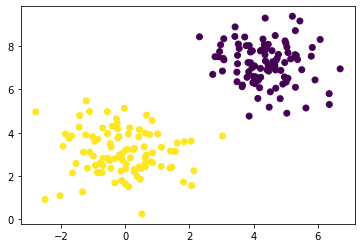

In [3]:
plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels)

In [4]:
blobs[0:10, :]

array([[-0.829,  2.143],
       [-1.181,  2.358],
       [-0.556,  3.962],
       [ 4.403,  7.886],
       [ 1.836,  3.588],
       [ 1.812,  1.718],
       [ 4.456,  8.088],
       [-1.872,  3.944],
       [ 3.416,  8.456],
       [ 0.367,  1.979]])

In [5]:
def recursive_split(X, cell, k, D, eps, opt, n_initial, delta, Z=[], c_centers=[], i=0):
    x1, x2, y1, y2 = cell
    points_in_cell = X[(X[:, 0] >= x1) & (X[:, 0] < x2) & (X[:, 1] >= y1) & (X[:, 1] < y2)]

    print((1-eps)*delta*(opt/pow(2, i)))
    
    if len(points_in_cell) < ((1-eps) * delta * (opt/pow(2, i))):
        # If there are less than the threshold number of points, it's a light cell
        # First time this is checked, it checks the grid g**1 if it is light (step #3)
        # Afterwards when it recurs it does step #3.4, marks c as a light cell and adds it to Z
        # Also when it recurs it does step #3.5 here (delete c from Y) as the light cell c will no longer be recured
        
        if len(points_in_cell) >= 1: 
            print(points_in_cell)
            # If c is not empty (this already checks step #4)
            Z.append(points_in_cell)
            # Save the center coordinates for step #4.1
            c_centers.append(((x1 + x2) / 2, (y1 + y2) / 2))
    else: 
        # Step #3.1 if c is heavy then
        # Split the cell
        # First time this executes - only if g**1 is heavy and splits it into 4 sub-cells c1, c2, c3, c4 (step #3)
        # Afterwards the level of each cell goes to g**i, with side length 2**i with each recursion
        i = i + 1
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2
        cells = [
            (x1, mid_x, y1, mid_y),  # Top-left
            (mid_x, x2, y1, mid_y),  # Top-right
            (x1, mid_x, mid_y, y2),  # Bottom-left
            (mid_x, x2, mid_y, y2)   # Bottom-right
        ]
        # Step #3.2 and #3.3 as it implicitly adds c1, c2, c3, c4 to Y with each recursion below
        for sub_cell in cells:
            recursive_split(points_in_cell, sub_cell, k, D, eps, opt, n_initial, delta, Z, c_centers, i)

    return Z, c_centers

In [8]:
k = 2
D = 0.01
eps = 0.1
X = blobs
alpha = 5 #take alpha as an arbitrary number - constant, lets say 5
n_initial = len(X) # n is the size of the current point set, a.k.a. n is all of the initial points
Opt = -int(- (alpha+1)*(np.log(np.sqrt(2)) / np.log(1 + eps)) // 1) #rounded up

In [ ]:
def coreset(Z, rep_c, delta, cs, eps):
    
    # rep_c = c_centers
    # Step #4.2: number of  points in each cell
    n_c = [len(c) for c in Z]
    
    # Step #4.3: pair respective center coordinates with number of points in each cell
    S = [] #pairs
    for index in range(0, len(rep_c)):
        S.append([rep_c[index], n_c[index]])
        if len(S) > cs*(1+eps)
    

In [9]:
#0
Z = np.empty((1,2)) # store light cells c

#1
# Let Y be the only cell in grid g**(log(D))
# Define the boundaries of the coordinate plane
x_min, x_max, y_min, y_max = min(X[:, 0]), max(X[:, 0]), min(X[:, 1]), max(X[:, 1])
Y = x_min, x_max, y_min, y_max

#2
# if x!= 0 then

if X.size > 0:
    print("The array is non-empty, proceed with the recursive algorithm")
    
    # Calculate delta
    delta = ((1/(4*k*np.sqrt(D)) * np.log(n_initial+1))) * pow((eps/(14*np.sqrt(D))), D)
    # Calculate coreset size
    cs = 2/delta + np.log(len(X)+2)*k*pow(2, D)
    
    # Start the recursive splitting
    Z, c_centers = recursive_split(X, Y, k, D, eps, Opt, n_initial, delta)
    
    # Start the 
    
else:
    print("The array is empty.")

# Step #4 and #4.1: center coordinates of each cell    
#rep_c = c_centers

# Step #4.2: number of  points in each cell
#n_c = [len(c) for c in Z]

# Step #4.3: pair respective center coordinates with number of points in each cell
# pairs = []
# for index in range(0, len(rep_c)):
#     pairs.append([rep_c[index], n_c[index]])

# Coreset calculation    
# the size of the coreset is at most:
#delta = 1/(4*k*np.sqrt(D)*np.log(len(X)+1))*pow((eps/(14*np.sqrt(D))), D)
#coreset = 2/delta + np.log(len(X)+2)*k*pow(2, D)  #cs

The array is non-empty, proceed with the recursive algorithm
127.83816263018427
63.919081315092136
31.959540657546068
[[-0.829  2.143]
 [-1.181  2.358]
 [-1.65   2.133]
 [-0.876  2.156]
 [-0.724  2.156]
 [-0.448  2.351]
 [-1.331  1.263]
 [-0.933  2.49 ]
 [-0.7    2.486]
 [-2.505  0.909]
 [-2.036  1.081]]
31.959540657546068
[[ 1.812e+00  1.718e+00]
 [ 3.670e-01  1.979e+00]
 [-1.350e-01  2.226e+00]
 [ 2.780e-01  2.290e+00]
 [ 1.116e+00  2.437e+00]
 [ 1.453e+00  2.405e+00]
 [-3.250e-01  1.681e+00]
 [ 4.620e-01  1.847e+00]
 [-1.000e-03  1.627e+00]
 [ 1.400e-02  2.329e+00]
 [-1.190e-01  1.790e+00]
 [ 4.930e-01  2.343e+00]
 [ 5.160e-01  2.410e-01]
 [ 6.230e-01  2.424e+00]
 [ 1.070e-01  1.498e+00]
 [ 2.840e-01  2.197e+00]
 [ 1.390e+00  2.362e+00]
 [ 4.310e-01  2.416e+00]]
31.959540657546068
[[-0.556  3.962]
 [-1.872  3.944]
 [-0.996  2.917]
 [-0.705  4.216]
 [-1.305  3.1  ]
 [-0.781  2.586]
 [-1.236  3.899]
 [-0.497  2.712]
 [-0.954  3.609]
 [-1.425  4.791]
 [-0.699  2.82 ]
 [-1.021  3.818]
 

In [12]:
[len(c) for c in Z]

[198, 11, 18, 22, 1, 2, 2, 3, 4, 2, 3, 8, 13, 2, 5, 5, 21, 21, 25, 30]

In [14]:
rep_c

[(1.9535, 4.8155),
 (-1.6056249999999999, 1.384625),
 (0.7671250000000001, 1.384625),
 (-1.6056249999999999, 3.671875),
 (-0.2709531249999999, 2.671203125),
 (0.025640625000000083, 2.671203125),
 (-0.2709531249999999, 2.957109375),
 (0.025640625000000083, 2.957109375),
 (0.47053125000000007, 2.81415625),
 (-0.12265624999999991, 3.38596875),
 (0.47053125000000007, 3.38596875),
 (1.3603125, 3.1000625),
 (0.17393750000000008, 4.2436875),
 (1.3603125, 4.2436875),
 (4.32625, 2.52825),
 (-0.4192499999999999, 7.10275),
 (3.139875, 5.959125),
 (5.512625, 5.959125),
 (3.139875, 8.246375),
 (5.512625, 8.246375)]

In [ ]:
# leftover code

In [ ]:
# #Opt is the cost of an optimal partition.

# def calculate_opt(P, C_opt):
#     # Calculate pairwise distances between points in P and C_opt
#     distances = np.linalg.norm(P[:, np.newaxis] - C_opt, axis=2)
    
#     # Calculate the median of the distances
#     Opt = np.median(distances)
    
#     return Opt

# Here Opt = Median(P,C_opt), P = X, C_opt = some 5 random points of X
#Opt = calculate_opt(X, X[np.random.choice(X.shape[0], 5, replace=False)])

In [ ]:
# def recursive_split(X, cell, threshold=3, Z=[], c_centers=[]):
#     x1, x2, y1, y2 = cell
#     points_in_cell = X[(X[:, 0] >= x1) & (X[:, 0] < x2) & (X[:, 1] >= y1) & (X[:, 1] < y2)]
    
#     if len(points_in_cell) < threshold:
#         # If there are less than the threshold number of points, it's a light cell
#         # First time this is checked, it checks the grid g**1 if it is light (step #3)
#         # Afterwards when it recurs it does step #3.4, marks c as a light cell and adds it to Z
#         # Also when it recurs it does step #3.5 here (delete c from Y) as the light cell c will no longer be recured
        
#         if len(points_in_cell) >= 1: 
#             print(points_in_cell)
#             # If c is not empty (this already checks step #4)
#             Z.append(points_in_cell)
#             # Save the center coordinates for step #4.1
#             c_centers.append(((x1 + x2) / 2, (y1 + y2) / 2))
#     else: 
#         # Step #3.1 if c is heavy then
#         # Split the cell
#         # First time this executes - only if g**1 is heavy and splits it into 4 sub-cells c1, c2, c3, c4 (step #3)
#         # Afterwards the level of each cell goes to g**i, with side length 2**i with each recursion
#         mid_x = (x1 + x2) / 2
#         mid_y = (y1 + y2) / 2
#         cells = [
#             (x1, mid_x, y1, mid_y),  # Top-left
#             (mid_x, x2, y1, mid_y),  # Top-right
#             (x1, mid_x, mid_y, y2),  # Bottom-left
#             (mid_x, x2, mid_y, y2)   # Bottom-right
#         ]
#         # Step #3.2 and #3.3 as it implicitly adds c1, c2, c3, c4 to Y with each recursion below
#         for sub_cell in cells:
#             recursive_split(points_in_cell, sub_cell, threshold, Z, c_centers)

#     return Z, c_centers

[[-2.505  0.909]
 [-2.036  1.081]]
[[-1.331  1.263]]
[[-1.65   2.133]]
[]
[]
[[-1.181  2.358]]
[]
[]
[[-0.876  2.156]]
[[-0.829  2.143]
 [-0.724  2.156]]
[]
[[-0.933  2.49 ]]
[[-0.448  2.351]
 [-0.7    2.486]]
[[0.516 0.241]]
[]
[]
[[-1.000e-03  1.627e+00]
 [ 1.070e-01  1.498e+00]]
[[-0.325  1.681]]
[[-0.119  1.79 ]]
[[0.462 1.847]]
[[-0.135  2.226]
 [ 0.014  2.329]]
[[0.367 1.979]
 [0.284 2.197]]
[]
[[0.278 2.29 ]
 [0.431 2.416]]
[[0.493 2.343]
 [0.623 2.424]]
[]
[[1.812 1.718]]
[[1.116 2.437]]
[[1.453 2.405]
 [1.39  2.362]]
[[-1.942  3.376]]
[[-1.305  3.1  ]
 [-1.538  2.575]]
[[-0.781  2.586]]
[[-0.497  2.712]]
[[-0.996  2.917]]
[[-0.699  2.82 ]
 [-0.545  2.824]]
[[-1.115  3.104]]
[]
[[-0.441  3.347]]
[[-0.954  3.609]]
[[-0.474  3.501]]
[]
[]
[[-1.755  3.738]]
[]
[[-1.872  3.944]]
[[-1.673  3.848]]
[]
[]
[]
[]
[[-1.236  3.899]
 [-1.021  3.818]]
[[-0.86   3.698]]
[]
[]
[[-0.556  3.962]
 [-0.705  4.216]]
[[-1.425  4.791]
 [-1.44   4.256]]
[]
[[-0.344  2.792]]
[[ 0.023  2.555]
 [-0.083 

C:\Users\Stasius\AppData\Local\Temp/ipykernel_20548/1846055008.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_array = np.array(result)


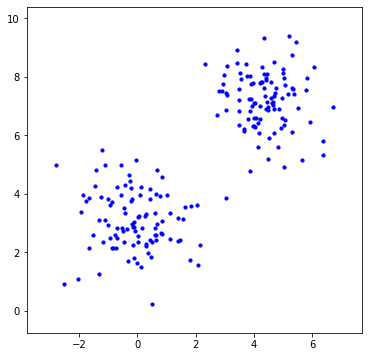

In [96]:
def recursive_split(X, rectangle, threshold=3, result=[]):
    x1, x2, y1, y2 = rectangle
    points_in_rectangle = X[(X[:, 0] >= x1) & (X[:, 0] < x2) & (X[:, 1] >= y1) & (X[:, 1] < y2)]
    
    if len(points_in_rectangle) < threshold:
        # If there are less than the threshold number of points, it's a light rectangle
        print(points_in_rectangle)
        if len(points_in_rectangle) >= 1:
            result.append(points_in_rectangle)
    else:
        # Split the rectangle
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2
        rectangles = [
            (x1, mid_x, y1, mid_y),  # Top-left
            (mid_x, x2, y1, mid_y),  # Top-right
            (x1, mid_x, mid_y, y2),  # Bottom-left
            (mid_x, x2, mid_y, y2)   # Bottom-right
        ]

        for sub_rect in rectangles:
            recursive_split(points_in_rectangle, sub_rect, threshold, result)

    return result

# Define the boundaries of the coordinate plane
x_min, x_max, y_min, y_max = min(blobs[:, 0]), max(blobs[:, 0]), min(blobs[:, 1]), max(blobs[:, 1])


# Create a plot to visualize the coordinate plane
plt.figure(figsize=(6, 6))
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# Start the recursive splitting
result = recursive_split(X, (x_min, x_max, y_min, y_max))

# Convert the result to a NumPy array
result_array = np.array(result)

# Plot the random points
x, y = X.T
plt.scatter(x, y, s=10, c='b', marker='o')



# Print the result (points in each rectangle)
print("Resulting Points in Each Rectangle:")
for i, rect in enumerate(result):
    print(f"Rectangle {i + 1}: {rect}")